<a href="https://www.kaggle.com/code/adamdandi/2025-training-performance-analysis?scriptVersionId=269298830" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **2025 Training Performance Analysis: Session Delivery Overview**

## **Introduction**

This document provides an overview of the training performance across 2025. It aims to analyse the number of sessions delivered during the year to understand the overall demand for each course. The analysis supports data-driven planning for future training programs and helps identify areas with higher participation or emerging needs. This aligns with the organisation’s goal to improve training effectiveness and resource allocation.

## **Objectives**

The key objectives of this documentation are to:

* Determine the total number of sessions delivered per course during 2025.
* Identify trends in session frequency across different training categories.
* Highlight areas of growth or decline to guide future program planning.
* Support decisions on course scheduling, instructor allocation, and resource investment.

Success will be measured by the clarity and accuracy of insights drawn from the data, enabling actionable planning for the next training cycle.

## **Scope**

The analysis covers all training sessions delivered between January and December 2025. It includes course titles, frequency, and participation data where available. The scope is limited to quantitative delivery metrics and does not include qualitative feedback or performance evaluation. All data is sourced from the internal training records and validated for consistency.

## **Methodology**

The analysis follows these key steps:

1. Collect and verify session data from the 2025 training records.
2. Organise courses by category and delivery frequency.
3. Apply filters to identify patterns and variations in demand.
4. Summarise findings in tables and charts for clarity.

This structured approach ensures that the data is complete, accurate, and ready for interpretation.

## **Expected Outcomes**

The expected outcomes of this analysis include:

* A clear summary of session delivery volume for each course.
* Insights into training demand trends across the year.
* Recommendations for strategic adjustments in future training plans.

The results will guide planning for the 2026 training calendar, ensuring efficient use of resources and alignment with learner demand.

In [1]:
import pandas as pd

data = pd.read_excel("/kaggle/input/participants2025/TKI-ED-2025-Editions-Delivered-v0.1-CS.xlsx")
# Check Data Structure
print("Data Structure:")
print(data.info())

Data Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 51 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Organizer                            4150 non-null   object 
 1   Facilitator                          4150 non-null   object 
 2   Co-Facilitator                       9 non-null      object 
 3   Course title                         4150 non-null   object 
 4   Course structure                     4130 non-null   object 
 5   Method                               4150 non-null   object 
 6   Start date                           4150 non-null   object 
 7   End date                             4150 non-null   object 
 8   Course city                          1985 non-null   object 
 9   Course country                       1986 non-null   object 
 10  Title                                448 non-null    object 
 11  First Name    

### **Data Selection**

In this step, we select only nine columns that are relevant to analysing session delivery in 2025. These columns capture essential course and scheduling information while excluding unrelated or unused fields. This focused selection improves clarity and processing efficiency during analysis.

The selected columns are:

1. **Organizer** – The company or unit responsible for managing the course.
2. **Facilitator** – The instructor leading the session.
3. **Course Title** – The official name of the course.
4. **Course Structure** – The type of session (for example, in-house or external).
5. **Method** – The delivery mode (for example, live or online).
6. **Start Date** – The date when the course begins.
7. **End Date** – The date when the course concludes.
8. **Course City** – The city where the training took place.
9. **Course Country** – The country where the session was delivered.

These columns provide all the information required to measure session delivery, frequency, and geographic distribution throughout the year.

In [2]:
# Select only the required columns for analysis
selected_columns = [
    'Organizer',
    'Facilitator',
    'Course title',
    'Course structure',
    'Method',
    'Start date',
    'End date',
    'Course city',
    'Course country'
]

# Create a new dataset containing only these columns
course = data[selected_columns]

# Display the first few rows to confirm the selection
print("Filtered course dataset (columns 1–9):")
display(course.head())

Filtered course dataset (columns 1–9):


,Organizer,Facilitator,Course title,Course structure,Method,Start date,End date,Course city,Course country
0,Vigilance Consulting,Dr. Saleh Al-Ansari,C-KPI,In-house,Live,19/2/2025,23/2/2025,NaN,Bahrain
1,TKI,Yasser Ghonimy,C-SBP,Open,Live,25/02/2025,29/02/2025,NaN,NaN
2,TKI,Amany Fakhry,C-KPI,Open,Live,19/05/2025,23/05/2025,NaN,NaN
3,TKI,Radu Cocean,C-SBP,Open,Live,06.01.2025,10.01.2025,NaN,NaN
4,TKI,Radu Cocean,C-SBP,Open,Live,06.01.2025,10.01.2025,NaN,NaN


### Duplicate Check and Participant Count

In this step, we define one session and count how many participant records belong to it. This helps us measure session volume without changing the source data.

#### Session Rule
A session is the unique combination of four columns: **Facilitator**, **Course Title**, **Start Date**, and **End Date**.

#### What We Do
1. Find duplicate rows based on the four columns above.  
2. Add a new column **Participants Count**, which stores the size of each group defined by the four columns.  
3. For any row with no duplicate, set **Participants Count** to 1. This column has no missing values.  
4. Produce three checks for quick validation:  
   - **Total rows**: the number of records in the filtered dataset.  
   - **Total participants count**: the sum of *Participants Count* across unique sessions. This equals the number of rows.  
   - **Total sessions**: the number of unique combinations of the four key columns.  
5. Show a short preview so we can confirm the result.

#### Assumptions and Guardrails
- We do not change the data type of any existing column.  
- We only add the **Participants Count** column.  
- All four grouping columns must be present and readable in the dataset.

In [3]:
# Define the session key
key_cols = ['Facilitator', 'Course title', 'Start date', 'End date']

# Count rows per unique session, aligned back to each row
group_sizes = course.groupby(key_cols, dropna=False).size()
course['Participants count'] = course[key_cols].merge(
    group_sizes.rename('Participants count').reset_index(),
    on=key_cols,
    how='left'
)['Participants count']

# Safety check: ensure no missing values in the new column, default to 1 if any appear
course['Participants count'] = course['Participants count'].fillna(1).astype(int)

# Summary numbers
total_rows = len(course)
total_sessions = group_sizes.shape[0]
total_participants = int(group_sizes.sum())  # equals total_rows by construction

# Print summaries
print("Total rows:", total_rows)
print("Total participants count:", total_participants)
print("Total sessions:", total_sessions)

# Preview
print("\nPreview:")
display(course.head())

Total rows: 4150
Total participants count: 4150
Total sessions: 246

Preview:


/tmp/ipykernel_14/2200101167.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  course['Participants count'] = course[key_cols].merge(
/tmp/ipykernel_14/2200101167.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  course['Participants count'] = course['Participants count'].fillna(1).astype(int)


,Organizer,Facilitator,Course title,Course structure,Method,Start date,End date,Course city,Course country,Participants count
0,Vigilance Consulting,Dr. Saleh Al-Ansari,C-KPI,In-house,Live,19/2/2025,23/2/2025,NaN,Bahrain,1
1,TKI,Yasser Ghonimy,C-SBP,Open,Live,25/02/2025,29/02/2025,NaN,NaN,1
2,TKI,Amany Fakhry,C-KPI,Open,Live,19/05/2025,23/05/2025,NaN,NaN,1
3,TKI,Radu Cocean,C-SBP,Open,Live,06.01.2025,10.01.2025,NaN,NaN,5
4,TKI,Radu Cocean,C-SBP,Open,Live,06.01.2025,10.01.2025,NaN,NaN,5


### Remove duplicates, keep one row per session

We will drop duplicate rows using the session keys, Facilitator, Course title, Start date, End date. We keep the first row of each session. The Participants count column already stores the group size, so the kept row holds the correct count. No other column types change.

In [4]:
# Keys that define one session
key_cols = ['Facilitator', 'Course title', 'Start date', 'End date']

# Remove duplicates, keep the first row per session
course_dedup = course.drop_duplicates(subset=key_cols, keep='first').copy()

# Quick checks
print("Rows before:", len(course))
print("Rows after :", len(course_dedup))
print("Rows removed:", len(course) - len(course_dedup))

print("\nPreview after dedupe:")
display(course_dedup.head())

Rows before: 4150
Rows after : 246
Rows removed: 3904

Preview after dedupe:


,Organizer,Facilitator,Course title,Course structure,Method,Start date,End date,Course city,Course country,Participants count
0,Vigilance Consulting,Dr. Saleh Al-Ansari,C-KPI,In-house,Live,19/2/2025,23/2/2025,NaN,Bahrain,1
1,TKI,Yasser Ghonimy,C-SBP,Open,Live,25/02/2025,29/02/2025,NaN,NaN,1
2,TKI,Amany Fakhry,C-KPI,Open,Live,19/05/2025,23/05/2025,NaN,NaN,1
3,TKI,Radu Cocean,C-SBP,Open,Live,06.01.2025,10.01.2025,NaN,NaN,5
8,TKI,Malek Mohammed Ghazo,C-KPI,Open,Live,2025-12-01 00:00:00,16/01/2025,NaN,NaN,24


In [5]:
# Check if there are still duplicates after the cleaning process
remaining_duplicates = course_dedup[course_dedup.duplicated(subset=['Facilitator', 'Course title', 'Start date', 'End date'], keep=False)]

# Display the results
if len(remaining_duplicates) == 0:
    print("✅ No duplicates remain. The data is clean.")
else:
    print(f"⚠️ There are still {len(remaining_duplicates)} duplicates remaining.")
    display(remaining_duplicates.head())

✅ No duplicates remain. The data is clean.


In [6]:
# Configure the table to scroll
def table(df, height=400):
    display(df.style.set_table_attributes(f'style="display:inline-block;overflow:auto;height:{height}px;width:auto;"').set_table_styles([{
        'selector': '',
        'props': [('border-collapse', 'collapse'),
                  ('margin', '0px')]}]))

# Display the table
table(course_dedup)

,Organizer,Facilitator,Course title,Course structure,Method,Start date,End date,Course city,Course country,Participants count
0,Vigilance Consulting,Dr. Saleh Al-Ansari,C-KPI,In-house,Live,19/2/2025,23/2/2025,nan,Bahrain,1
1,TKI,Yasser Ghonimy,C-SBP,Open,Live,25/02/2025,29/02/2025,nan,nan,1
2,TKI,Amany Fakhry,C-KPI,Open,Live,19/05/2025,23/05/2025,nan,nan,1
3,TKI,Radu Cocean,C-SBP,Open,Live,06.01.2025,10.01.2025,nan,nan,5
8,TKI,Malek Mohammed Ghazo,C-KPI,Open,Live,2025-12-01 00:00:00,16/01/2025,nan,nan,24
32,TKI,Raluca Vintila,C-KPI,Open,Live,13/01/2025,17/01/2025,nan,nan,10
42,TKI,Michael Romero,KPI-E,In-house,Face to face,13/01/2025,13/01/2025,Labuan,Malaysia,26
68,Vigilance,Dr. Raed Al-Jowder,C-SBP,Open,Live,12.01.2025,16.01.2025,nan,nan,12
80,TKI,Radu Cocean,"PM, BSC & KPI-M",In-house,Face to face,13/01/2025,14/01/2025,Riyadh,Saudi Arabia,23
103,TKI,Radu Cocean,"PM, BSC & KPI-M",In-house,Face to face,15/01/2025,16/01/2025,Riyadh,Saudi Arabia,33


In [7]:
# Export cleaned data to Excel file
output_path = '/kaggle/working/Course-Season-2025-clean.xlsx'
course_dedup.to_excel(output_path, index=False)

print(f"✅ Data successfully exported to: {output_path}")

✅ Data successfully exported to: /kaggle/working/Course-Season-2025-clean.xlsx


# Robust Multi-Pass Date Parsing

* **Parsing order (`parse_dates_robustly`)** Standardizes dates with a strict fallback:

  1. Excel serials (e.g., `45748`), 2) `dayfirst=True` (e.g., `06/01/2025`, `19/05/2025`), 3) `dayfirst=False` (e.g., `2025/02/06`). This fixes the earlier misparse.

* **Duration math** — He adds **`Duration (days)` = (End std − Start std) + 1**, so a one-day course yields `1`, not `0`.

* **Targeted flags** — He builds **`suspicious_mask`** for rows where:

  * Duration `< 1` (end before start, e.g., swapped parses),
  * Duration `> 15` (unusually long; review).

* **Clear outputs** — He returns two tables:

  1. Rows with suspicious durations,
  2. Rows with unparsed dates (**NaT**) needing cleanup.

In [8]:
import numpy as np
import re

# 0) Start from the deduplicated dataset
course_clean = course_dedup.copy()

# 1) Make text copies and normalise separators to '/'
course_clean['Start date raw'] = course_clean['Start date'].astype(str)
course_clean['End date raw']   = course_clean['End date'].astype(str)

def normalise_to_slash(s: pd.Series) -> pd.Series:
    """Trim, then replace '-' and '.' with '/'."""
    return s.str.strip().str.replace(r'[-\.]', '/', regex=True)

course_clean['Start date norm'] = normalise_to_slash(course_clean['Start date raw'])
course_clean['End date norm']   = normalise_to_slash(course_clean['End date raw'])


# 2) Define robust parsing functions
def parse_excel_serial(s: pd.Series) -> pd.Series:
    """Convert plain integer excel serials to datetime."""
    # Only apply to strings that are purely digits
    mask = s.str.fullmatch(r'\d+')
    # Coerce non-matches to NaT (Not a Time)
    ser = pd.to_numeric(s.where(mask), errors='coerce')
    # The origin '1899-12-30' is standard for Excel compatibility
    return pd.to_datetime(ser, unit='d', origin='1899-12-30', errors='coerce')

def parse_dates_robustly(s: pd.Series) -> pd.Series:
    """
    Parse dates using a multi-pass strategy for better accuracy.
    Handles various formats like DD/MM/YYYY, YYYY/MM/DD, and Excel serials.
    """
    # Pass 1: Handle Excel serial dates first, as they are unambiguous
    parsed = parse_excel_serial(s)
    
    # Create a mask for rows that still need parsing
    remaining_mask = parsed.isna()
    
    # Pass 2: Try parsing the remaining dates with dayfirst=True (e.g., DD/MM/YYYY)
    # This is common in many regions, including Indonesia.
    p_dayfirst = pd.to_datetime(s[remaining_mask], dayfirst=True, errors='coerce')
    parsed = parsed.fillna(p_dayfirst)
    
    # Update the mask for any remaining unparsed dates
    remaining_mask = parsed.isna()
    
    # Pass 3: For the rest, try parsing with dayfirst=False.
    # This correctly handles YYYY/MM/DD and MM/DD/YYYY formats.
    p_monthfirst = pd.to_datetime(s[remaining_mask], dayfirst=False, errors='coerce')
    parsed = parsed.fillna(p_monthfirst)
    
    return parsed

# 3) Apply the robust parser to create standardized datetime columns
course_clean['Start date std'] = parse_dates_robustly(course_clean['Start date norm'])
course_clean['End date std']   = parse_dates_robustly(course_clean['End date norm'])


# 4) Calculate course duration in days
# We add 1 because a course from 06-Feb to 06-Feb is 1 day long, not 0.
duration = (course_clean['End date std'] - course_clean['Start date std'])
course_clean['Duration (days)'] = duration.dt.days + 1


# 5) Identify suspicious rows based on duration
# A duration < 1 means the End Date is before the Start Date (parsing error).
# A duration > 15 is flagged for manual review as potentially unusual.
suspicious_mask = (course_clean['Duration (days)'] < 1) | (course_clean['Duration (days)'] > 15)


# 6) Create tables for review

# Table 1: All rows that failed to parse (NaT)
nat_mask = course_clean['Start date std'].isna() | course_clean['End date std'].isna()
nat_table = course_clean[nat_mask][[
    'Organizer', 'Facilitator', 'Course title',
    'Start date raw', 'End date raw'
]]

# Table 2: All rows with suspicious durations
suspicious_table = course_clean[suspicious_mask][[
    'Organizer', 'Facilitator', 'Course title',
    'Start date raw', 'End date raw',
    'Start date std', 'End date std', 'Duration (days)'
]]


# 7) Print summary and display tables for review
rows_total = len(course_clean)
nat_count = len(nat_table)
suspicious_count = len(suspicious_table)

print(f"Total Rows Processed: {rows_total}")
print(f"Rows with Parsing Failure (NaT): {nat_count}")
print(f"Rows with Suspicious Duration (<1 or >15 days): {suspicious_count}\n")

print(" ROWS WITH SUSPICIOUS DURATION ")
print("Review these for incorrect date parsing (e.g., End Date < Start Date)")
display(suspicious_table)

print("\n ROWS THAT FAILED TO PARSE (NaT) ")
print("Review these for non-date text or unsupported formats")
display(nat_table)

Total Rows Processed: 246
Rows with Parsing Failure (NaT): 2
Rows with Suspicious Duration (<1 or >15 days): 57

 ROWS WITH SUSPICIOUS DURATION 
Review these for incorrect date parsing (e.g., End Date < Start Date)


/tmp/ipykernel_14/2359182064.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  p_monthfirst = pd.to_datetime(s[remaining_mask], dayfirst=False, errors='coerce')
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


,Organizer,Facilitator,Course title,Start date raw,End date raw,Start date std,End date std,Duration (days)
8,TKI,Malek Mohammed Ghazo,C-KPI,2025-12-01 00:00:00,16/01/2025,2025-12-01,2025-01-16,-318.0
397,TKI,Andrea Minelli,C-BSC,2025-02-02 00:00:00,2025-06-02 00:00:00,2025-02-02,2025-06-02,121.0
406,TKI,Cristina Mihailoaie,C-PA,2025-03-02 00:00:00,2025-07-02 00:00:00,2025-03-02,2025-07-02,123.0
413,TKI,Mihai Toma,C-BSC,2025-03-02 00:00:00,2025-07-02 00:00:00,2025-03-02,2025-07-02,123.0
494,TKI,Mohamed Khaled,C-TP,2025-02-02 00:00:00,2025-06-02 00:00:00,2025-02-02,2025-06-02,121.0
505,Leoron,Yasser Ghonimy,C-SBP,2025-11-02 00:00:00,13/02/2025,2025-11-02,2025-02-13,-261.0
545,TKI,Ahmed Al-Zahrani,C-KPI,2025-09-02 00:00:00,13/02/2025,2025-09-02,2025-02-13,-200.0
579,TKI,Mihai Toma,C-SBP,2025-10-02 00:00:00,14/02/2025,2025-10-02,2025-02-14,-229.0
603,TKI,Raluca Vintila,C-KPI,2025-10-02 00:00:00,14/02/2025,2025-10-02,2025-02-14,-229.0
664,TKI,Dr. Alina Miertoiu,C-OKR,2025-10-02 00:00:00,13/02/2025,2025-10-02,2025-02-13,-230.0



 ROWS THAT FAILED TO PARSE (NaT) 
Review these for non-date text or unsupported formats


,Organizer,Facilitator,Course title,Start date raw,End date raw
1,TKI,Yasser Ghonimy,C-SBP,25/02/2025,29/02/2025
2338,TKI,Yassine Chaker,C-B,22/6/2025,26/6/20225


### Data Cleaning & Validation Plan

#### 1. Identify Ambiguity
For each date in the `suspicious_table`, we'll check if both its **day** and **month** fall between 1 and 12.  
This helps us detect dates that might have been misinterpreted due to ambiguous formats (e.g., `03/07` could be March 7th or July 3rd).

#### 2. Create a Flag
We'll add a **new column** to the table that marks which rows contain these **ambiguous dates**.  
This makes it easy to isolate and review them before correction.

#### 3. Swap Day and Month
For the **flagged dates**, we'll **swap the day and month** values.  
This corrects the likely **day/month parsing error** caused by format inconsistencies (e.g., US vs. EU formats).

#### 4. Recalculate Duration
After correcting the dates, we'll **recalculate the duration** (e.g., between `start_date` and `end_date`) to confirm that the fix yields **logical, consistent durations**.

#### 5. Show Before & After
Finally, we'll produce a **comparison table** that shows:
- The original (ambiguous) data  
- The corrected (cleaned) data  

This allows for a **clear visual verification** of changes before finalizing the cleaned dataset.

In [9]:
# Create a copy to work on, preserving the original table
resolved_table = suspicious_table.copy()

print(" Original Suspicious Table ")
print("Notice 'Course B' has a negative duration, indicating a parsing error.")
display(suspicious_table)


# 1. Define a function to check if a date is ambiguous (day and month are 1-12)
def is_date_ambiguous(dt):
    """Returns True if a datetime object's day and month are both between 1 and 12."""
    if pd.isna(dt):
        return False
    return 1 <= dt.day <= 12 and 1 <= dt.month <= 12

# 2. Apply this function to create boolean flags for start and end dates
resolved_table['start_is_ambiguous'] = resolved_table['Start date std'].apply(is_date_ambiguous)
resolved_table['end_is_ambiguous'] = resolved_table['End date std'].apply(is_date_ambiguous)

# Create a single flag for the entire row
resolved_table['Ambiguous Flag'] = resolved_table['start_is_ambiguous'] | resolved_table['end_is_ambiguous']


# 3. Define a function to swap the day and month of a datetime object
def swap_day_month(dt):
    """Returns a new datetime object with the day and month swapped."""
    if pd.isna(dt):
        return pd.NaT
    # Create a new Timestamp to avoid errors with non-existent dates (e.g., 31st of Feb)
    return pd.Timestamp(year=dt.year, month=dt.day, day=dt.month)


# 4. Create new 'resolved' columns
# Initialize them with the original dates
resolved_table['Start date resolved'] = resolved_table['Start date std']
resolved_table['End date resolved'] = resolved_table['End date std']

# Conditionally apply the swap only where the dates were flagged as ambiguous
resolved_table.loc[resolved_table['start_is_ambiguous'], 'Start date resolved'] = resolved_table.loc[resolved_table['start_is_ambiguous'], 'Start date std'].apply(swap_day_month)
resolved_table.loc[resolved_table['end_is_ambiguous'], 'End date resolved'] = resolved_table.loc[resolved_table['end_is_ambiguous'], 'End date std'].apply(swap_day_month)


# 5. Recalculate the duration based on the new 'resolved' dates
new_duration = (resolved_table['End date resolved'] - resolved_table['Start date resolved'])
resolved_table['Duration resolved (days)'] = new_duration.dt.days + 1


# 6. Create the final "Before and After" comparison table for easy review
comparison_view = resolved_table[[
    'Course title',
    'Start date std',
    'End date std',
    'Duration (days)',
    'Ambiguous Flag',
    'Start date resolved',
    'End date resolved',
    'Duration resolved (days)'
]].copy()

# Format dates for clearer display
for col in ['Start date std', 'End date std', 'Start date resolved', 'End date resolved']:
    comparison_view[col] = comparison_view[col].dt.strftime('%Y-%m-%d')


print("\n\n Corrected Dates and Durations (Comparison View) ")
print("The 'resolved' columns show the corrected dates and logical durations.")
display(comparison_view)

 Original Suspicious Table 
Notice 'Course B' has a negative duration, indicating a parsing error.


,Organizer,Facilitator,Course title,Start date raw,End date raw,Start date std,End date std,Duration (days)
8,TKI,Malek Mohammed Ghazo,C-KPI,2025-12-01 00:00:00,16/01/2025,2025-12-01,2025-01-16,-318.0
397,TKI,Andrea Minelli,C-BSC,2025-02-02 00:00:00,2025-06-02 00:00:00,2025-02-02,2025-06-02,121.0
406,TKI,Cristina Mihailoaie,C-PA,2025-03-02 00:00:00,2025-07-02 00:00:00,2025-03-02,2025-07-02,123.0
413,TKI,Mihai Toma,C-BSC,2025-03-02 00:00:00,2025-07-02 00:00:00,2025-03-02,2025-07-02,123.0
494,TKI,Mohamed Khaled,C-TP,2025-02-02 00:00:00,2025-06-02 00:00:00,2025-02-02,2025-06-02,121.0
505,Leoron,Yasser Ghonimy,C-SBP,2025-11-02 00:00:00,13/02/2025,2025-11-02,2025-02-13,-261.0
545,TKI,Ahmed Al-Zahrani,C-KPI,2025-09-02 00:00:00,13/02/2025,2025-09-02,2025-02-13,-200.0
579,TKI,Mihai Toma,C-SBP,2025-10-02 00:00:00,14/02/2025,2025-10-02,2025-02-14,-229.0
603,TKI,Raluca Vintila,C-KPI,2025-10-02 00:00:00,14/02/2025,2025-10-02,2025-02-14,-229.0
664,TKI,Dr. Alina Miertoiu,C-OKR,2025-10-02 00:00:00,13/02/2025,2025-10-02,2025-02-13,-230.0




 Corrected Dates and Durations (Comparison View) 
The 'resolved' columns show the corrected dates and logical durations.


,Course title,Start date std,End date std,Duration (days),Ambiguous Flag,Start date resolved,End date resolved,Duration resolved (days)
8,C-KPI,2025-12-01,2025-01-16,-318.0,True,2025-01-12,2025-01-16,5
397,C-BSC,2025-02-02,2025-06-02,121.0,True,2025-02-02,2025-02-06,5
406,C-PA,2025-03-02,2025-07-02,123.0,True,2025-02-03,2025-02-07,5
413,C-BSC,2025-03-02,2025-07-02,123.0,True,2025-02-03,2025-02-07,5
494,C-TP,2025-02-02,2025-06-02,121.0,True,2025-02-02,2025-02-06,5
505,C-SBP,2025-11-02,2025-02-13,-261.0,True,2025-02-11,2025-02-13,3
545,C-KPI,2025-09-02,2025-02-13,-200.0,True,2025-02-09,2025-02-13,5
579,C-SBP,2025-10-02,2025-02-14,-229.0,True,2025-02-10,2025-02-14,5
603,C-KPI,2025-10-02,2025-02-14,-229.0,True,2025-02-10,2025-02-14,5
664,C-OKR,2025-10-02,2025-02-13,-230.0,True,2025-02-10,2025-02-13,4


### Course Duration Quality Checks

#### 1. Unusually Long Courses
Identify all **courses lasting more than 15 days**.  
These may indicate **data entry errors** or **incorrect end dates** (e.g., an extra zero in the duration).

#### 2. Illogical Duration
Flag any **courses lasting less than 1 day**.  
Such cases likely mean that the **end date is earlier than the start date**, pointing to a **reversal or input mistake**.

#### 3. Failed to Parse (NaT)
Detect rows where **date parsing failed** — resulting in `NaT` (Not a Time) values.  
These records indicate **unreadable or invalid date formats**, requiring manual review or data correction.

In [10]:
#  Main Logic: Filter for remaining problematic rows 

# 1. Filter for courses with unusually long durations
long_duration_mask = resolved_table['Duration resolved (days)'] > 15
long_duration_table = resolved_table[long_duration_mask]

# 2. Filter for courses with illogical durations (less than 1 day)
short_duration_mask = resolved_table['Duration resolved (days)'] < 1
short_duration_table = resolved_table[short_duration_mask]

# 3. Define columns for a clean, consistent view
review_cols = [
    'Organizer', 'Course title',
    'Start date raw', 'End date raw',
    'Start date resolved', 'End date resolved', 'Duration resolved (days)'
]

#  Display Final Actionable Tables 

print("FINAL REVIEW LISTS")
print("Use these tables to perform manual corrections on your source data.")

print("\n\n## 1. Unusually Long Duration (> 15 days)")
print("Check if these long durations are correct or if there's a typo in the year or month.")
if long_duration_table.empty:
    print("--> No courses found with a duration longer than 15 days.")
else:
    display(long_duration_table[review_cols])

print("\n" + "="*50 + "\n") # Separator

print("## 2. Illogical Duration (< 1 day)")
print("The End Date is before the Start Date. This requires manual correction.")
if short_duration_table.empty:
    print("--> No courses found with a negative duration.")
else:
    display(short_duration_table[review_cols])
    
print("\n" + "="*50 + "\n") # Separator

print("## 3. Failed to Parse (NaT Rows)")
print("These rows contain text or formats that could not be converted to dates.")
if nat_table.empty:
    print("--> No rows failed to parse.")
else:
    display(nat_table)

FINAL REVIEW LISTS
Use these tables to perform manual corrections on your source data.


## 1. Unusually Long Duration (> 15 days)
Check if these long durations are correct or if there's a typo in the year or month.


,Organizer,Course title,Start date raw,End date raw,Start date resolved,End date resolved,Duration resolved (days)
3335,TKI,C-KPI,17/08/2025,19/05/2028,2025-08-17,2028-05-19,1007




## 2. Illogical Duration (< 1 day)
The End Date is before the Start Date. This requires manual correction.


,Organizer,Course title,Start date raw,End date raw,Start date resolved,End date resolved,Duration resolved (days)
1772,TKI,C-KPI,2025-11-05 00:00:00,13/04/2025,2025-05-11,2025-04-13,-27
2540,TKI,KPI-M,25/06/2025,24/06/2025,2025-06-25,2025-06-24,0
2906,TKI,BSC-M,15/7/2025,17/5/2025,2025-07-15,2025-05-17,-58
3028,iLead,C-SBP,27/7/2025,20/7/2025,2025-07-27,2025-07-20,-6




## 3. Failed to Parse (NaT Rows)
These rows contain text or formats that could not be converted to dates.


,Organizer,Facilitator,Course title,Start date raw,End date raw
1,TKI,Yasser Ghonimy,C-SBP,25/02/2025,29/02/2025
2338,TKI,Yassine Chaker,C-B,22/6/2025,26/6/20225


In [11]:
#  1. Consolidate Automatic Fixes into the Main DataFrame 
# First, let's create the 'resolved' columns in your main 'course_clean' DataFrame.
# We'll start by copying the standard parsed dates.
course_clean['Start date resolved'] = course_clean['Start date std']
course_clean['End date resolved'] = course_clean['End date std']
course_clean['Duration resolved (days)'] = course_clean['Duration (days)']

# Now, update 'course_clean' with the automatic swaps you performed in 'resolved_table'.
# The .update() method neatly transfers the corrected data back to your main table.
course_clean.update(resolved_table)


#  2. Manual Input: Define your corrections here 
# Use the DataFrame index as the key.
# Provide the CORRECT 'start' and 'end' dates in 'YYYY-MM-DD' format.
manual_corrections = {
    # Illogical Duration (< 1 day)
    1772: {'start': '2025-04-11', 'end': '2025-04-13'},  # Start date was likely April 11, not May 11
    2540: {'start': '2025-06-24', 'end': '2025-06-25'},  # Start and End were swapped
    2906: {'start': '2025-05-15', 'end': '2025-05-17'},  # Month was likely May (5), not July (7)
    3028: {'start': '2025-07-20', 'end': '2025-07-27'},  # Start and End were swapped

    # Long Duration (> 15 days)
    3335: {'start': '2025-08-17', 'end': '2025-08-19'},  # End year was likely 2025, not 2028

    # NaT Rows (Failed to Parse)
    1:    {'start': '2025-02-25', 'end': '2025-02-28'},  # 29/02/2025 is invalid, corrected to 28
    2338: {'start': '2025-06-22', 'end': '2025-06-26'},  # Correcting typo in end date year (20225 -> 2025)
}


#  3. Apply Corrections and Recalculate 

# Get the list of rows we are about to fix for the "Before" view
indices_to_fix = list(manual_corrections.keys())
print(" DATA BEFORE MANUAL FIX ")
# Use course_clean, your actual DataFrame name
display(course_clean.loc[indices_to_fix])

# Loop through the dictionary and apply each correction to your main DataFrame
for index, dates in manual_corrections.items():
    if index in course_clean.index:
        # Convert string dates to datetime objects
        start_date = pd.to_datetime(dates['start'], errors='coerce')
        end_date = pd.to_datetime(dates['end'], errors='coerce')

        # Assign the corrected dates
        course_clean.loc[index, 'Start date resolved'] = start_date
        course_clean.loc[index, 'End date resolved'] = end_date
        
        # Recalculate duration for the fixed row
        duration = (end_date - start_date).days + 1
        course_clean.loc[index, 'Duration resolved (days)'] = duration
    else:
        print(f"Warning: Index {index} not found in DataFrame.")

print("\n\n DATA AFTER MANUAL FIX ")
print("Durations are now logical and NaT rows have been populated. ✅")
# Display the same rows from course_clean to see the "After" view
display(course_clean.loc[indices_to_fix])

 DATA BEFORE MANUAL FIX 


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Organizer,Facilitator,Course title,Course structure,Method,Start date,End date,Course city,Course country,Participants count,Start date raw,End date raw,Start date norm,End date norm,Start date std,End date std,Duration (days),Start date resolved,End date resolved,Duration resolved (days)
1772,TKI,Mariham Magdy,C-KPI,Open,Face to face,2025-11-05 00:00:00,13/04/2025,Dubai,United Arab Emirates,2,2025-11-05 00:00:00,13/04/2025,2025/11/05 00:00:00,13/04/2025,2025-11-05,2025-04-13,-205.0,2025-05-11,2025-04-13,-27.0
2540,TKI,Andrea Minelli,KPI-M,In-house,Face to face,25/06/2025,24/06/2025,Phnom Penh,Cambodia,51,25/06/2025,24/06/2025,25/06/2025,24/06/2025,2025-06-25,2025-06-24,0.0,2025-06-25,2025-06-24,0.0
2906,TKI,Manhal Al Dakhlallah,BSC-M,In-house,Live,15/7/2025,17/5/2025,NaN,NaN,12,15/7/2025,17/5/2025,15/7/2025,17/5/2025,2025-07-15,2025-05-17,-58.0,2025-07-15,2025-05-17,-58.0
3028,iLead,Amany Fakhry,C-SBP,In-house,Face to face,27/7/2025,20/7/2025,Riyadh,Saudi Arabia,28,27/7/2025,20/7/2025,27/7/2025,20/7/2025,2025-07-27,2025-07-20,-6.0,2025-07-27,2025-07-20,-6.0
3335,TKI,Dr. Saleh Al-Ansari,C-KPI,In-house,Face to face,17/08/2025,19/05/2028,Riyadh,Saudi Arabia,13,17/08/2025,19/05/2028,17/08/2025,19/05/2028,2025-08-17,2028-05-19,1007.0,2025-08-17,2028-05-19,1007.0
1,TKI,Yasser Ghonimy,C-SBP,Open,Live,25/02/2025,29/02/2025,NaN,NaN,1,25/02/2025,29/02/2025,25/02/2025,29/02/2025,2025-02-25,NaT,NaN,2025-02-25,NaT,NaN
2338,TKI,Yassine Chaker,C-B,Open,Live,22/6/2025,26/6/20225,NaN,NaN,5,22/6/2025,26/6/20225,22/6/2025,26/6/20225,2025-06-22,NaT,NaN,2025-06-22,NaT,NaN




 DATA AFTER MANUAL FIX 
Durations are now logical and NaT rows have been populated. ✅


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Organizer,Facilitator,Course title,Course structure,Method,Start date,End date,Course city,Course country,Participants count,Start date raw,End date raw,Start date norm,End date norm,Start date std,End date std,Duration (days),Start date resolved,End date resolved,Duration resolved (days)
1772,TKI,Mariham Magdy,C-KPI,Open,Face to face,2025-11-05 00:00:00,13/04/2025,Dubai,United Arab Emirates,2,2025-11-05 00:00:00,13/04/2025,2025/11/05 00:00:00,13/04/2025,2025-11-05,2025-04-13,-205.0,2025-04-11,2025-04-13,3.0
2540,TKI,Andrea Minelli,KPI-M,In-house,Face to face,25/06/2025,24/06/2025,Phnom Penh,Cambodia,51,25/06/2025,24/06/2025,25/06/2025,24/06/2025,2025-06-25,2025-06-24,0.0,2025-06-24,2025-06-25,2.0
2906,TKI,Manhal Al Dakhlallah,BSC-M,In-house,Live,15/7/2025,17/5/2025,NaN,NaN,12,15/7/2025,17/5/2025,15/7/2025,17/5/2025,2025-07-15,2025-05-17,-58.0,2025-05-15,2025-05-17,3.0
3028,iLead,Amany Fakhry,C-SBP,In-house,Face to face,27/7/2025,20/7/2025,Riyadh,Saudi Arabia,28,27/7/2025,20/7/2025,27/7/2025,20/7/2025,2025-07-27,2025-07-20,-6.0,2025-07-20,2025-07-27,8.0
3335,TKI,Dr. Saleh Al-Ansari,C-KPI,In-house,Face to face,17/08/2025,19/05/2028,Riyadh,Saudi Arabia,13,17/08/2025,19/05/2028,17/08/2025,19/05/2028,2025-08-17,2028-05-19,1007.0,2025-08-17,2025-08-19,3.0
1,TKI,Yasser Ghonimy,C-SBP,Open,Live,25/02/2025,29/02/2025,NaN,NaN,1,25/02/2025,29/02/2025,25/02/2025,29/02/2025,2025-02-25,NaT,NaN,2025-02-25,2025-02-28,4.0
2338,TKI,Yassine Chaker,C-B,Open,Live,22/6/2025,26/6/20225,NaN,NaN,5,22/6/2025,26/6/20225,22/6/2025,26/6/20225,2025-06-22,NaT,NaN,2025-06-22,2025-06-26,5.0


## Add Full Course Name and Summarise 2025 Sessions

### What will be done
1. Read the grouped sheet from the Excel file at `/kaggle/input/participants2025/TKI-ED-2025-Editions-Delivered-v0.1-CS.xlsx`.  
2. Map **Course Title** acronyms to full names and add a new column, **Course Name**.  
3. Filter sessions to calendar year **2025**.  
4. Print totals for **sessions** and **participants**.  
5. Build quick summaries by **Course Name**, **Facilitator**, **Month**, **Method**, and **Country**.  
6. Show short head previews for each summary.  
7. Optionally export all outputs to a single Excel file.

### Outputs
* A dataset with an added **Course Name** column.  
* Counts for total sessions and total participants in 2025.  
* Summary tables by course, facilitator, month, method, and country.  
* Head previews for quick checks.  
* One optional Excel export that contains all results.

### Assumptions and guardrails
* No existing column types are changed.  
* Only the **Course Name** column is added.  
* The mapping for acronyms to full names is complete and correct, or any missing items are reported.  
* Year filtering uses the start date of each session.  

Step 1: Loading course acronyms 
Acronym mapping successful.

 Step 2: Preparing the main dataset 
Dataset prepared for 2025.

 Step 3: Overall Performance Totals for 2025 
Total Sessions Delivered in 2025: 246
Total Participants Trained in 2025: 4150

 Step 4: Generating Summaries and Charts 

 Summary by Course Name:


,Session_Count,Participant_Count
Course Name,,
Certified KPI Professional,83,1456
Certified Strategy and Business Planning Professional,43,730
Certified KPI Professional and Practitioner,31,553
Certified OKR Professional,18,242
Certified Balanced Scorecard Management System Professional,13,204


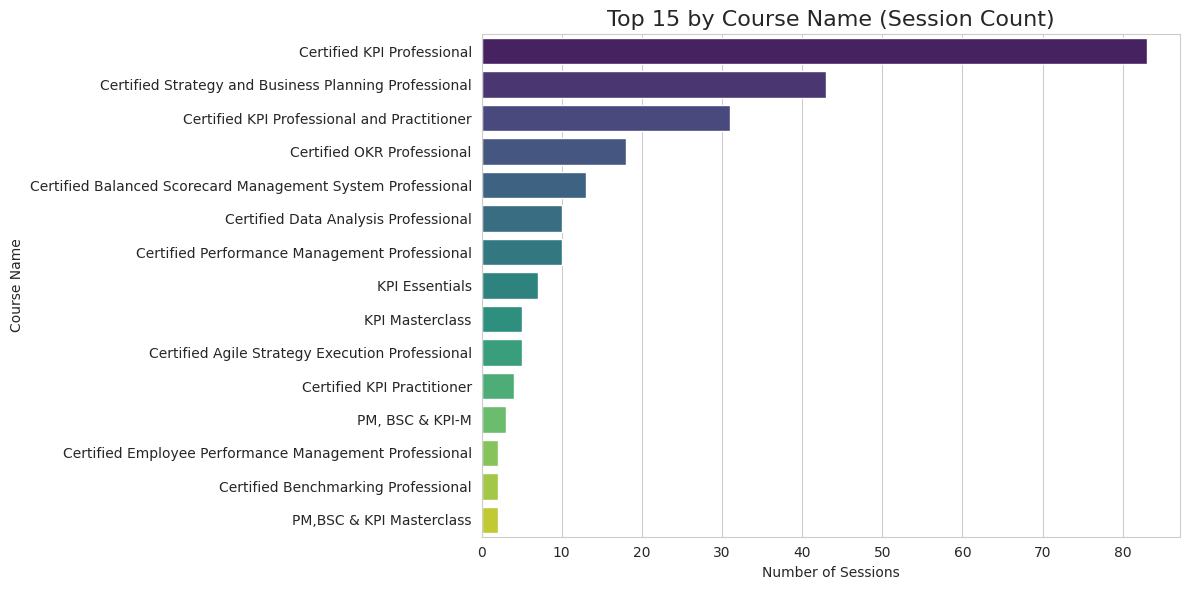


 Summary by Facilitator:


,Session_Count,Participant_Count
Facilitator,,
Dr. Alina Miertoiu,21,324
Mariham Magdy,21,382
Abdulaziz Hussein,19,357
Yasser Ghonimy,17,271
Manhal Al Dakhlallah,16,278


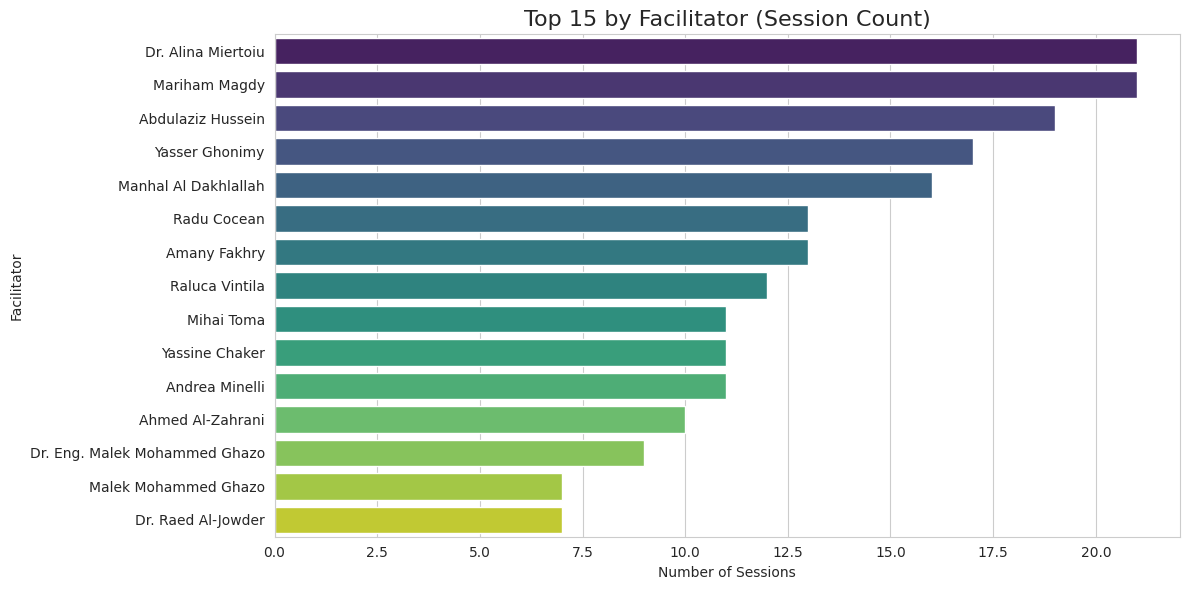


 Summary by Month:


,Session_Count,Participant_Count
Month,,
05-May,38,595
08-August,38,601
02-February,32,436
06-June,28,509
04-April,27,531


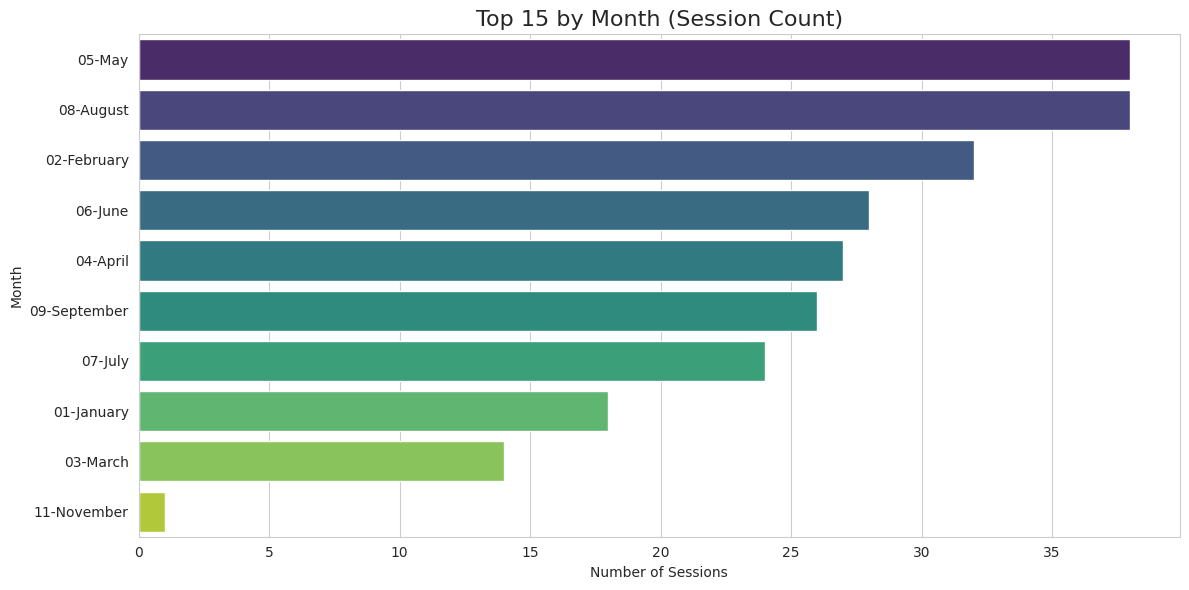


 Summary by Method:


,Session_Count,Participant_Count
Method,,
Live,136,2134
Face to face,110,2016


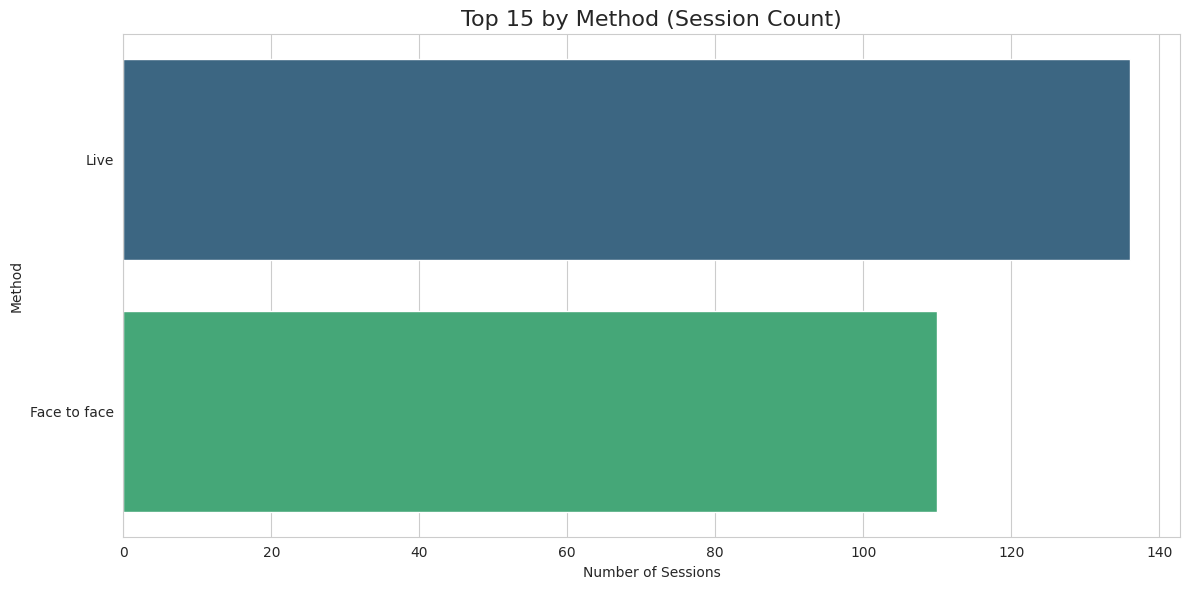


 Summary by Course country:


,Session_Count,Participant_Count
Course country,,
Saudi Arabia,76,1517
United Arab Emirates,10,106
Malaysia,7,86
United Kingdom,4,31
Brunei Darussalam,3,55


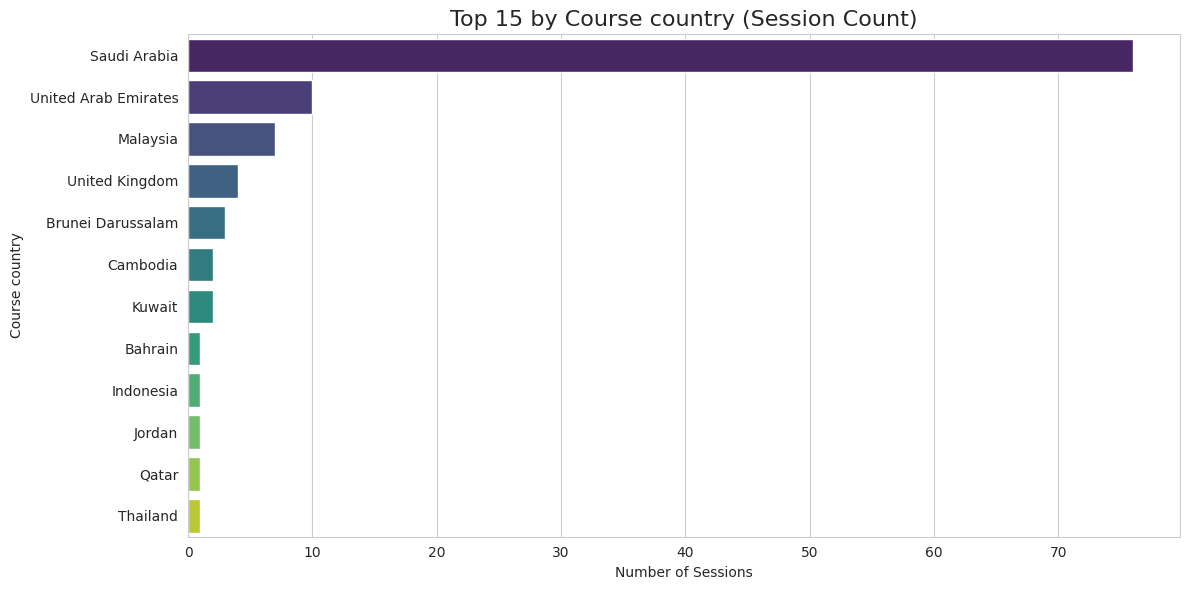


 Step 5: Exporting results to Excel 
📂 All results have been successfully exported to 'Training_Performance_Analysis_2025.xlsx'


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Course Name Mapping Data
print("Step 1: Loading course acronyms ")
try:
    # Define the path to your Excel file
    file_path = '/kaggle/input/participants2025/TKI-ED-2025-Editions-Delivered-v0.1-CS.xlsx'
    
    # Read the 'grouped' sheet
    grouped_df = pd.read_excel(file_path, sheet_name='grouped')
    
    # Create a mapping dictionary from 'Acronym' to 'Product Name'
    # .strip() is used to remove any accidental leading/trailing spaces
    acronym_map = pd.Series(
        grouped_df['Product Name'].values,
        index=grouped_df['Acronym'].str.strip()
    ).to_dict()
    print("Acronym mapping successful.\n")
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}. Please check the path.")
    acronym_map = {} # Create an empty dict to avoid further errors


#  2. Prepare the Main DataFrame for Analysis 
print(" Step 2: Preparing the main dataset ")
# Create a clean copy for this analysis
analysis_df = course_clean.copy()

# Map the 'Course title' to the full 'Course Name'.
# If an acronym isn't found in the map, it keeps its original value from 'Course title'.
analysis_df['Course Name'] = analysis_df['Course title'].str.strip().map(acronym_map)
analysis_df['Course Name'] = analysis_df['Course Name'].fillna(analysis_df['Course title'])

# Filter the data to include only sessions from the calendar year 2025
# We use the 'Start date resolved' column as it's the most reliable one
df_2025 = analysis_df[analysis_df['Start date resolved'].dt.year == 2025].copy()

# Add a 'Month' column to enable monthly summaries. We format it for easy sorting.
df_2025['Month'] = df_2025['Start date resolved'].dt.strftime('%m-%B') # e.g., "01-January"
print("Dataset prepared for 2025.\n")


#  3. Calculate and Print Overall Totals for 2025 
print(" Step 3: Overall Performance Totals for 2025 ")
total_sessions_2025 = len(df_2025)
# Ensure 'Participants count' is numeric, coercing errors to NaN and then filling with 0
df_2025['Participants count'] = pd.to_numeric(df_2025['Participants count'], errors='coerce').fillna(0)
total_participants_2025 = int(df_2025['Participants count'].sum())

print(f"Total Sessions Delivered in 2025: {total_sessions_2025}")
print(f"Total Participants Trained in 2025: {total_participants_2025}\n")


#  4. Build and Display Summaries with Charts 
print(" Step 4: Generating Summaries and Charts ")
sns.set_style("whitegrid") # Set a nice style for the charts

def create_summary_and_chart(df, group_by_col):
    """A helper function to create a summary table and a bar chart."""
    summary = df.groupby(group_by_col).agg(
        Session_Count=('Course Name', 'size'),
        Participant_Count=('Participants count', 'sum')
    ).astype(int).sort_values(by='Session_Count', ascending=False)
    
    print(f"\n Summary by {group_by_col}:")
    display(summary.head())
    
    # Plotting
    plt.figure(figsize=(12, 6))
    sns.barplot(data=summary.head(15), x='Session_Count', y=summary.head(15).index, palette='viridis')
    plt.title(f'Top 15 by {group_by_col} (Session Count)', fontsize=16)
    plt.xlabel('Number of Sessions')
    plt.ylabel(group_by_col)
    plt.tight_layout()
    plt.show()

# Generate summary for each requested category
create_summary_and_chart(df_2025, 'Course Name')
create_summary_and_chart(df_2025, 'Facilitator')
create_summary_and_chart(df_2025, 'Month')
create_summary_and_chart(df_2025, 'Method')
create_summary_and_chart(df_2025, 'Course country')


#  5. Optional: Export All Results to a Single Excel File 
print("\n Step 5: Exporting results to Excel ")
output_excel_path = 'Training_Performance_Analysis_2025.xlsx'

with pd.ExcelWriter(output_excel_path) as writer:
    # Write the main filtered data
    df_2025.to_excel(writer, sheet_name='Data_2025', index=False)
    
    # Write each summary to a separate sheet
    df_2025.groupby('Course Name').agg(S=('Course Name', 'size'), P=('Participants count', 'sum')).to_excel(writer, sheet_name='Summary_by_Course')
    df_2025.groupby('Facilitator').agg(S=('Facilitator', 'size'), P=('Participants count', 'sum')).to_excel(writer, sheet_name='Summary_by_Facilitator')
    df_2025.groupby('Month').agg(S=('Month', 'size'), P=('Participants count', 'sum')).to_excel(writer, sheet_name='Summary_by_Month')
    df_2025.groupby('Method').agg(S=('Method', 'size'), P=('Participants count', 'sum')).to_excel(writer, sheet_name='Summary_by_Method')
    df_2025.groupby('Course country').agg(S=('Course country', 'size'), P=('Participants count', 'sum')).to_excel(writer, sheet_name='Summary_by_Country')

print(f"📂 All results have been successfully exported to '{output_excel_path}'")